In [33]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import ConstantModel, LorentzianModel
import scipy as sp
def fit_lorentzian(x, y, reflection = False):
    """
    Fits a lorenztian making its own estimates for initial guesses
    This function will guess the initial parameters and return the fitted values
    """
    peak = LorentzianModel()
    background = ConstantModel()
    model = peak + background
    params = model.make_params(amplitude=np.max(y)-np.min(y), sigma=100, center=x[np.argmax(y)], c=np.min(y))
    if reflection:
        result = model.fit(y, x=x, amplitude=-(np.max(y)-np.min(y)), sigma=0.1, center=x[np.argmin(y)], c=np.max(y))
    else:
        result = model.fit(y, x=x, amplitude=np.max(y)-np.min(y), params=params, nan_policy="omit")

    return result

In [34]:
def phonon_number(ti, Xi, welch_segments = 5):
    freqs, PSD = sp.signal.welch(Xi, fs=1/(ti[1]-ti[0]), nperseg=Xi.shape[0]//welch_segments)
    results = fit_lorentzian(freqs, PSD)
    plt.plot(freqs, PSD, ".")
    plt.plot(freqs, results.best_fit)
    plt.xlim(0, 2e6)
    area = results.best_values["amplitude"]
    nphonons = area-0.5
    return nphonons

# Un mode

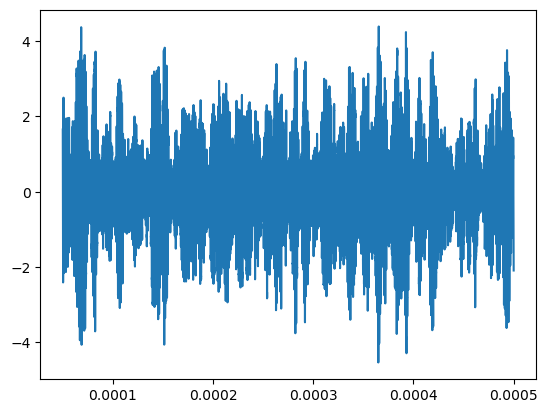

In [35]:
data = np.loadtxt(r"/home/pol/dev/qomsim/src/moments/1mode.csv", delimiter=",", skiprows=1)
t = data[:,0]*1e-6
X = data[:,1]
P = data[:,2]
# Steady state
tss = t[t>50e-6]
Xss = X[t>50e-6]
plt.plot(tss, Xss)

n = 1.0493730461294963


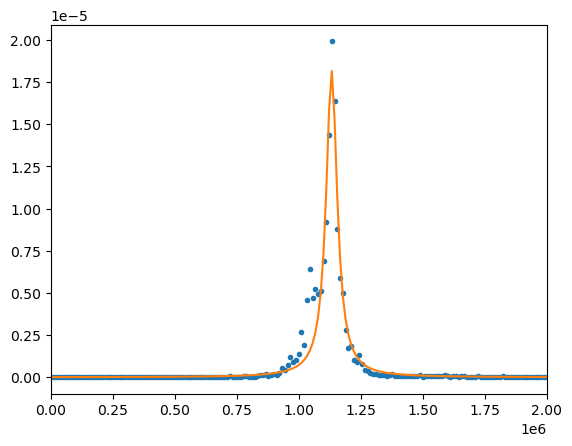

In [36]:
print("n =",phonon_number(tss, Xss))
#plt.yscale("log")

# 3 modes

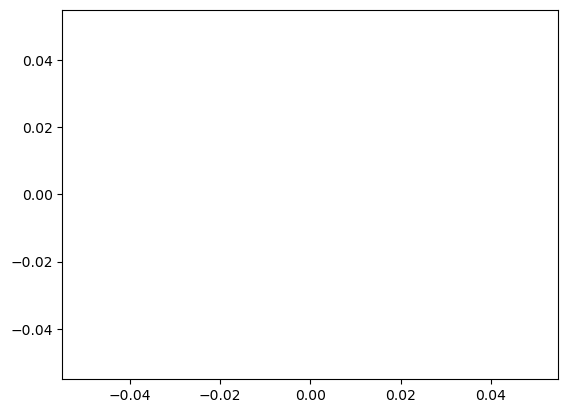

In [38]:
data = np.loadtxt(r"/home/pol/dev/qomsim/src/moments/3modescurt.csv", delimiter=",", skiprows=1)

# t = data[::2,0]*1e-6
# Xmain = data[::2,1]
# Xlow = data[::2,3]
# Xhigh = data[::2,5]
t = data[:,0]*1e-6
Xmain = data[:,1]
Xhigh = data[:,5]
Xlow = data[:,3]

# Steady state
tss = t[t>100e-6]
Xmainss = Xmain[t>100e-6]
Xlowss = Xlow[t>100e-6]
Xhighss = Xhigh[t>100e-6]

plt.plot(tss, Xmainss)
plt.plot(tss, Xlowss)
plt.plot(tss, Xhighss)

array([], dtype=float64)

nmain = 5372.464552293512


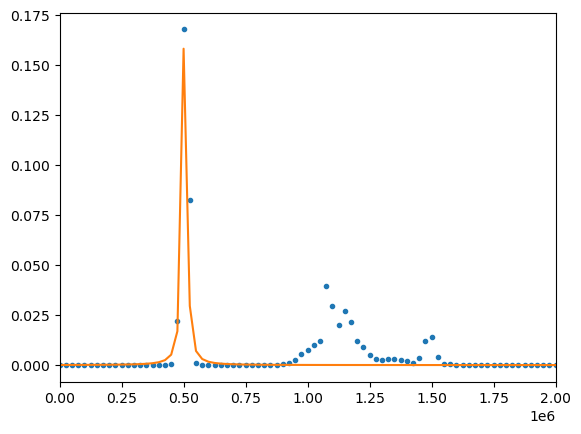

In [24]:
nmain = phonon_number(tss, Xmainss[:])
# nlow = phonon_number(tss, Xlowss[:])
# nhigh = phonon_number(tss, Xhighss[:])

print("nmain =", nmain)
# print("nlow =", nlow)
# print("nhigh =", nhigh)

# 3 modes, optimal gain

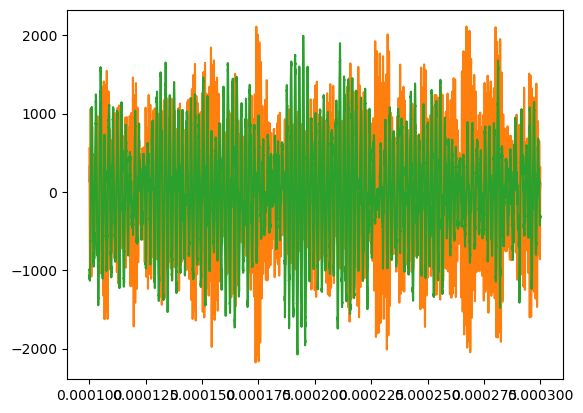

In [53]:
data = np.loadtxt(r"c:\Users\dalre\Downloads\3modes_gain_04.csv", delimiter=",", skiprows=1)

t = data[::2,0]*1e-6
Xmain = data[::2,1]
Xlow = data[::2,3]
Xhigh = data[::2,5]

# Steady state
tss = t[t>100e-6]
Xmainss = Xmain[t>100e-6]
Xlowss = Xlow[t>100e-6]
Xhighss = Xhigh[t>100e-6]

plt.plot(tss, Xmainss)
plt.plot(tss, Xlowss)
plt.plot(tss, Xhighss)

nmain = 10747.140703335126


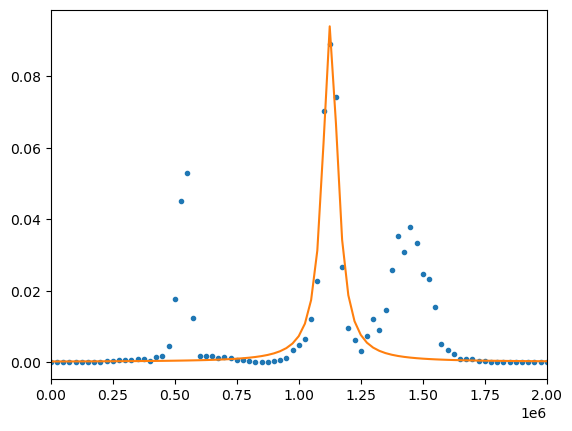

In [55]:
nmain = phonon_number(tss, Xmainss[:])
print("nmain =", nmain)

nlow = 764944.5035723208
nhigh = 248752.67555685315


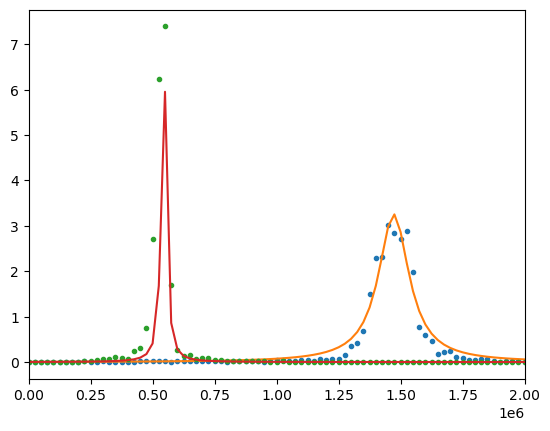

In [56]:
nlow = phonon_number(tss, Xlowss[:])
nhigh = phonon_number(tss, Xhighss[:])

print("nlow =", nlow)
print("nhigh =", nhigh)